<!DOCTYPE html>
<html>
<body>

<h1 style="text-align:center">Location selection for new business in Manhattan and Brooklyn</h1>
<img src="./manhattan.jpg">
<p><h2>1 Introduction</h2></p>
<p><h3>1.1 Description and a discussion of the background.</h3></p>
<p><h4>1.1.1 Background</h4></p>
<p>Manhattan, often referred to by residents of the New York City area as the City, is the most densely populated of the five boroughs of New York City, and coextensive with the County of New York, one of the original counties of the U.S. state of New York. Manhattan serves as the city's economic and administrative center, cultural identifier,1 and historical birthplace.2 The borough consists mostly of Manhattan Island, bounded by the Hudson, East, and Harlem rivers; as well as several small adjacent islands. Manhattan additionally contains Marble Hill, a small neighborhood now on the U.S. mainland, that was connected using landfill to the Bronx and separated from the rest of Manhattan by the Harlem River. Manhattan Island is divided into three informally bounded components, each aligned with the borough's long axis: Lower, Midtown, and Upper Manhattan. Brooklyn is also a borough of New York City, coterminous with Kings County, located in the U.S. state of New York. It is the most populous county in the state, the second-most densely populated county in the United States,3 and New York City's most populous borough, with an estimated 2,648,403 residents in 2020.4 Named after the Dutch village of Breukelen, it shares a land border with the borough of Queens at the western end of Long Island. Brooklyn has several bridge and tunnel connections to the borough of Manhattan across the East River, and the Verrazzano-Narrows Bridge connects it with Staten Island.

Although there are numerous restaurants spread in the two boroughs, there are new ones opening all the time. Therefore to analyze locations, types, and the number of these restaurants is a plus for those who want to open a new restaurant in the city.</p>

<p>1.1.2 Problem Searching an optimal location to open a restaurant or other new business in the two boroughs can be challenging. One could think that the better location for it should be at a place where there is no restaurant. But the problem is that perhaps most of the interested customers instead of going to an isolated neighborhood, prefer to go to a popular neighborhood, where there are more options and there is movement of people. While the concurrence will be big in these regions, the flux of interested customers in this specific region will be relevant as well. Many people, for example, go on the weekends to a specific restaurant and when they arrive, there is a large line waiting for them. This usually happens because it is also a new trend, in some popular restaurants, not to have an option to make a reservation. The good news is that perhaps some of the customers, those who do not want to wait too long in line, might want to search for similar options in the neighborhood. 

1 "New York City". TravelPulse. July 26, 2018. Archived from the original on May 8, 2020. Retrieved May 11, 2020. 

2 "Manhattan, New York – Some of the Most Expensive Real Estate in the World Overlooks Central Park". The Pinnacle List. Archived from the original on November 29, 2014. Retrieved November 24, 2014. 

3 GCT-PH1; Population, Housing Units, Area, and Density: 2000 – United States – County by State; and for Puerto Rico from the Census 2000 Summary File 1 (SF 1) 100-Percent Data Archived February 12, 2020, at Archive.today, United States Census Bureau. Retrieved September 18, 2016. 

4 https://data.cityofnewyork.us/City-Government/2020-population/t8c6-3i7b</p>
</body>
</html>


<!DOCTYPE html>
<html>
<body>

<p><h2>2. Data acquisition</h2></p>
<p><h3>2.1 Data source</h3></p>

<p>
To consider the problem we can list the datas as below:
<dl>
  <dt>Spatial Data Repository of NYU [5].from Spatial Data Repository of NYU, I cleaned the data and use it to create choropleth map.</dt>
  <dd>- 1.	2010 Median Age in Manhattan and Brooklyn</dd>
  <dd>- 2.	2010 Housing Characteristics in Manhattan and Brooklyn</dd>
  <dd>- 2010 New York City Boroughs</dd>
  <dt>Foursquare API to select the number of restaurants and their location in some neighborhoods of NYC[6].</dt>
</dl>
<br>
[5] NYC Spatial Data repository. https://geo.nyu.edu/catalog?f%5Bdct_spatial_sm%5D%5B%5D=New+York%2C+New+York%2C+United+States&bbox=-74.558716%2040.195659%20-73.399658%2041.19519<br>
[6] Forsquare API  https://developer.foursquare.com/

</p>
<p><h3>2.2 Feature selection</h3></p>
<p>
I will first create a dataset thought the Foursquare API, exploring several types of venues, such as ID, name, category (restaurant), latitude, longitude, neighborhood, and distance (in meters) to Manhattan and Brooklyn, NYC, where both are very famous to have various restaurants.<br>

I will save the data collected using Foursquare API to a CSV file and then read them with Pandas.<br>

Then, I will create another dataset that has information about places with densest population in NYC. First, I will create the features "pop_density" and "housing" of these places and then with the help of json files, I will get the latitude, longitude features. Then, I will save to a file CSV and read it with Pandas.<br>

</p>
</body>
</html>


# 3 Methodology
## 3.1 Exploratory Data Analysis
As a database, I used GitHub repository in my study. The next task is essentially transforming this data of nested Python dictionaries into a pandas dataframe. So let's start by creating an empty dataframe. My master data which has the main components Borough, Population_density, most welcome business, Latitude and Longitude informations of the city. 

In [6]:
#Quickly examine the resulting dataframe.
M_brook_housing.head(4)

,geoid10,namelsad10,total_pop,totalunits,occupied,vacant,rent,shape_area,cartodb_id,bbox
0,36047044900,Census Tract 449,2932,1125,1085,40,21,0.000249,420,"[-73.94109242829646, 40.707757257992974, -73.9..."
1,36047070600,Census Tract 706,2700,1078,1023,55,12,0.000272,748,"[-73.9102614121285, 40.60530270637726, -73.889..."
2,36061029900,Census Tract 299,3834,1493,1478,15,15,0.000101,1037,"[-73.9247164315008, 40.85512028722816, -73.908..."
3,36047034000,Census Tract 340,2248,649,646,3,3,0.000014,19,"[-74.00254943898581, 40.57152822906081, -73.99..."


In [30]:
**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough. I used python folium library to visualize geographic details of NYC and its boroughs and I created a map of NYC with boroughs superimposed on top. I used latitude and longitude values to get the visual as below:

I utilized the Foursquare API to explore the boroughs and segment them. I designed the limit as 100 venue and the radius 1000 meter for each borough from their given latitude and longitude informations. Here is a head of the list Venues name, category, latitude and longitude informations from Forsquare API.

In [172]:
borough.head()

,Borough,Neighborhood,latitude,longitude
281,Brooklyn,Weeksville,40.675040,-73.930531
267,Bronx,Claremont Village,40.831428,-73.901199
259,Brooklyn,Remsen Village,40.652117,-73.916653
121,Manhattan,Little Italy,40.719324,-73.997305
106,Manhattan,East Harlem,40.792249,-73.944182


# 4 Results

In [204]:
print(manhattan_brooklyn_venues.shape)
manhattan_brooklyn_venues.head()

(1500, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Roosevelt Island,40.781357,-73.949124,Equinox East 92nd Street,40.782500,-73.950580,Gym
1,Roosevelt Island,40.781357,-73.949124,Ballet Academy East,40.782803,-73.950723,Dance Studio
2,Roosevelt Island,40.781357,-73.949124,Kaia Wine Bar,40.781776,-73.951718,Wine Bar
3,Roosevelt Island,40.781357,-73.949124,Elite Unisex Salon and Barber Shop,40.783032,-73.948402,Salon / Barbershop
4,Roosevelt Island,40.781357,-73.949124,DTUT,40.780818,-73.949350,Coffee Shop


In [207]:
print('There are {} uniques categories.'.format(len(manhattan_brooklyn_venues['Venue Category'].unique())))

There are 200 uniques categories.


In [211]:
num_top_venues = 5

for hood in mb_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mb_grouped[mb_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
# The above code outputs top 5 venues of each district 

----Bedford Stuyvesant----
                       venue  freq
0                  Bookstore  0.10
1         Mexican Restaurant  0.10
2                       Park  0.07
3  Latin American Restaurant  0.07
4              Deli / Bodega  0.07


----Brighton Beach----
                       venue  freq
0        American Restaurant  0.07
1         Italian Restaurant  0.05
2         Salon / Barbershop  0.03
3  Latin American Restaurant  0.03
4               Cocktail Bar  0.03


----Bushwick----
                       venue  freq
0                   Wine Bar  0.10
1              Deli / Bodega  0.07
2         Mexican Restaurant  0.05
3                 Restaurant  0.05
4  Latin American Restaurant  0.05


----Carnegie Hill----
                  venue  freq
0           Yoga Studio  0.07
1    Italian Restaurant  0.07
2           Coffee Shop  0.07
3  Gym / Fitness Center  0.07
4                   Bar  0.07


----Carroll Gardens----
             venue  freq
0             Park  0.10
1      Yoga Studio 

In [288]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mb_grouped['Neighborhood']

for ind in np.arange(mb_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mb_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bedford Stuyvesant,Bookstore,Mexican Restaurant,Bakery,Latin American Restaurant,Park,Deli / Bodega,Jazz Club,Museum,Laundry Service,Supermarket
1,Brighton Beach,American Restaurant,Italian Restaurant,Café,Cocktail Bar,Gym,Grocery Store,Jazz Club,Latin American Restaurant,Gym / Fitness Center,Bar
2,Bushwick,Wine Bar,Deli / Bodega,Mexican Restaurant,Latin American Restaurant,Restaurant,Pizza Place,Park,Farmers Market,Café,Bistro
3,Carnegie Hill,Yoga Studio,Bakery,Bar,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Grocery Store,Salad Place,Mexican Restaurant,Juice Bar
4,Carroll Gardens,Park,Yoga Studio,Gym,Bar,Beach,Scenic Lookout,Playground,Pizza Place,Pet Store,Athletics & Sports


## 4. Cluster Neighborhoods

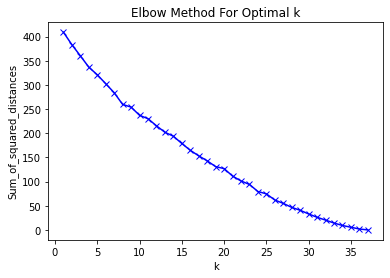

In [292]:
Finally, we try to cluster these 5 districts based on the venue categories and use K-Means clustering. So our expectation would be based on the similarities of venue categories, these districts will be clustered. 
K-means is a type of unsupervised learning and one of the popular methods of clustering unlabelled data into k clusters. One of the trickier tasks in clustering is identifying the appropriate number of clusters k. In this tutorial, we will provide an overview of how k-means works and discuss how to implement your own clusters. As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.
Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k. In the plot above the elbow is at k=7 indicating the optimal k for this dataset is 7.

In [300]:
We can represent these 7 clusters in a leaflet map using Folium library as below 

# 5. Results and Discussion:

In [331]:
Finally, we try to cluster these two districts based on the venue categories and use K-Means clustering. So our expectation would be based on the similarities of venue categories, these districts will be clustered. I have used the code snippet below —Here is my merged table with cluster labels for each borough.

,latitude,longitude,Borough,Neighborhood,pop_density,housing_occupied_ratio,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,total_pop
821,40.781357,-73.949124,Manhattan,Roosevelt Island,1,0.933604,1,Coffee Shop,Pizza Place,Vietnamese Restaurant,Cocktail Bar,Sandwich Place,Pub,Bagel Shop,Peruvian Restaurant,Community Center,13749
991,40.845800,-73.934457,Brooklyn,East Flatbush,0.997268,0.952960,3,Latin American Restaurant,Pizza Place,Tapas Restaurant,Café,Mobile Phone Shop,Fast Food Restaurant,Farmers Market,Lounge,Spanish Restaurant,12087
814,40.783579,-73.947504,Manhattan,Yorkville,0.937269,0.929302,1,Deli / Bodega,Gym,Coffee Shop,Italian Restaurant,Café,Wine Shop,Wine Bar,Vietnamese Restaurant,Sandwich Place,5345
73,40.778823,-73.950977,Manhattan,Hamilton Heights,0.933862,0.901902,1,Gym,Wine Shop,Coffee Shop,Gym / Fitness Center,Pizza Place,Café,Burger Joint,Sandwich Place,Cocktail Bar,7904
54,40.809032,-73.958600,Brooklyn,Flatbush,0.908105,0.941637,1,Cocktail Bar,Gym / Fitness Center,Park,Bakery,Italian Restaurant,Gym,Thai Restaurant,Burger Joint,Café,3329
858,40.836848,-73.942223,Brooklyn,Bedford Stuyvesant,0.906082,0.950393,5,Bookstore,Mexican Restaurant,Bakery,Latin American Restaurant,Park,Deli / Bodega,Jazz Club,Museum,Laundry Service,14934
64,40.768474,-73.958527,Brooklyn,Flatbush,0.897473,0.887732,1,Cocktail Bar,Gym / Fitness Center,Park,Bakery,Italian Restaurant,Gym,Thai Restaurant,Burger Joint,Café,12774
992,40.774930,-73.953818,Queens,Hunters Point,0.881707,0.899877,1,Italian Restaurant,Ice Cream Shop,Bakery,Bar,Park,Pizza Place,Seafood Restaurant,American Restaurant,Bookstore,12444
905,40.740079,-73.979234,Brooklyn,Windsor Terrace,0.867448,0.931525,6,Indian Restaurant,Gourmet Shop,Bar,Grocery Store,Yoga Studio,Sandwich Place,New American Restaurant,Mediterranean Restaurant,Hotel,11740
861,40.842934,-73.938343,Brooklyn,East Williamsburg,0.855212,0.952658,3,Spanish Restaurant,Bookstore,Latin American Restaurant,Thai Restaurant,Park,Gym / Fitness Center,Bubble Tea Shop,Empanada Restaurant,Lounge,11236


We reached at the end of the analysis, where we got a sneak peak of the top 10 populated area in Manhattan and brooklyn, as the business problem started with benefits and drawbacksin one of the busiest districts, the data exploration was mostly concentrated on population. I have used data from web resources like Wikipedia, python libraries like Geopy, and Foursquare API, to set up a very realistic data-analysis scenario. We have found out that —
Starting a coffee Shop is the best choice at Roosevelt Island, Manhattan because the place have the highest population density and coffee shop is the most welcome

# 6. Conclusion

Finally to conclude this project, We have got a small glimpse of how real life data-science projects look like. I’ve made use of some frequently used python libraries to scrap web-data, use Foursquare API to explore the major districts of Tokyo and saw the results of segmentation of districts using Folium leaflet map. Potential for this kind of analysis in a real life business problem is discussed in great detail. Also, some of the drawbacks and chance for improvements to represent even more realistic pictures are mentioned. Finally, starting a business targeting on population density, Specially cafe, bars, restaurants as most frequent venues! Hopefully, this kind of analysis will provide you initial guidance to take more real-life challenges using data-science.

In [2]:
!jupyter nbconvert Capstone_shenghui_report.ipynb --to html

[NbConvertApp] Converting notebook Capstone_shenghui_report.ipynb to html
[NbConvertApp] Writing 2406659 bytes to Capstone_shenghui_report.html


In [1]:
1

1